<a href="https://colab.research.google.com/github/HoangThangCDT/Homework/blob/main/Predict_fruit_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


In [15]:

im_shape = (150,150)

TRAINING_DIR = '../content/drive/MyDrive/train_data'
TEST_DIR = '../content/drive/MyDrive/test_data'

seed = 10

BATCH_SIZE = 16

In [16]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [17]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 398 images belonging to 10 classes.
Found 95 images belonging to 10 classes.
Found 146 images belonging to 10 classes.
Classes: ['bơ', 'cam', 'cherry', 'chuoi', 'kiwi', 'nho', 'strawberry', 'tao', 'thom', 'xoai']


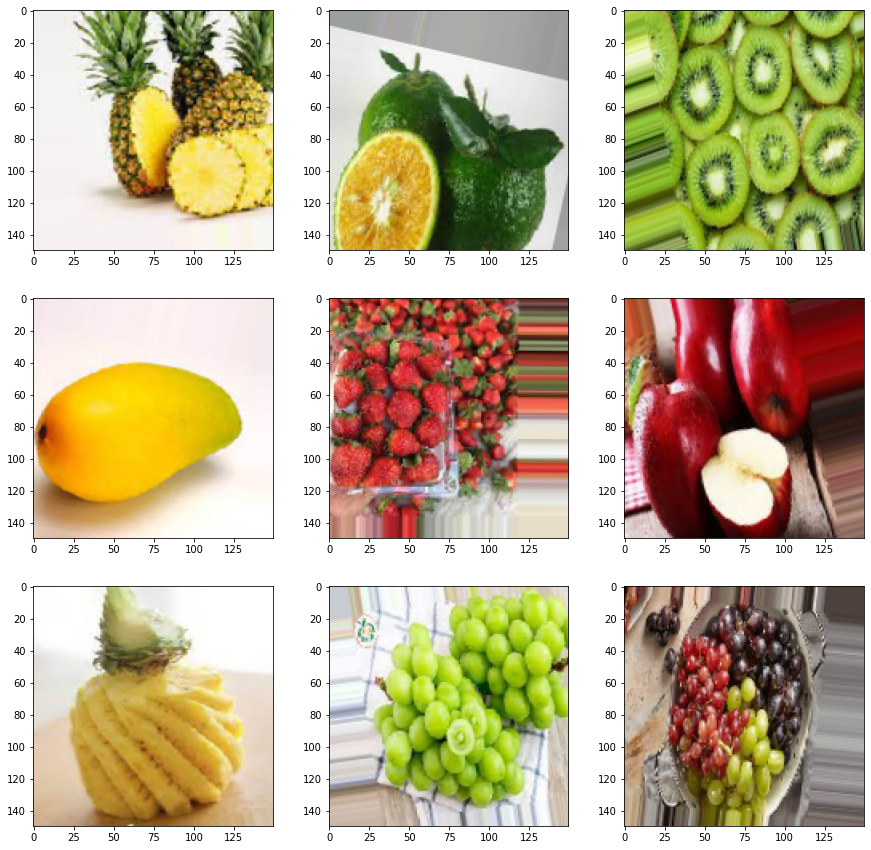

In [6]:
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 331776)            0         
                                                                 
 dense (Dense)               (None, 128)               42467456  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [28]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=100,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/100
24/24 [==============================] - 3s 135ms/step - loss: 0.5977 - accuracy: 0.7775 - val_loss: 0.9211 - val_accuracy: 0.7625
Epoch 2/100
24/24 [==============================] - 3s 131ms/step - loss: 0.6012 - accuracy: 0.7932 - val_loss: 0.7911 - val_accuracy: 0.8375
Epoch 3/100
24/24 [==============================] - 3s 131ms/step - loss: 0.6280 - accuracy: 0.7749 - val_loss: 0.9144 - val_accuracy: 0.7375
Epoch 4/100
24/24 [==============================] - 3s 133ms/step - loss: 0.6650 - accuracy: 0.7539 - val_loss: 0.8761 - val_accuracy: 0.7500
Epoch 5/100
24/24 [==============================] - 3s 130ms/step - loss: 0.6191 - accuracy: 0.7775 - val_loss: 0.9070 - val_accuracy: 0.7375
Epoch 6/100
24/24 [==============================] - 3s 135ms/step - loss: 0.6236 - accuracy: 0.7696 - val_loss: 0.9638 - val_accuracy: 0.8000
Epoch 7/100
24/24 [==============================] - 3s 131ms/step - loss: 0.6419 - accuracy: 0.7723 - val_loss: 1.1208 - val_accuracy: 0.7125

In [29]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [30]:
model.save('final.h')

INFO:tensorflow:Assets written to: final.h/assets


In [31]:
model5 = tf.keras.models.load_model('final.h')

'strawberry'

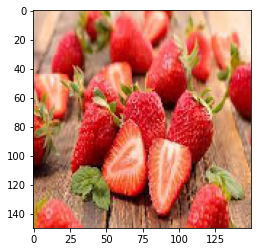

In [36]:
img=load_img('/content/tải xuống (4).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]


In [ ]:
|